In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt

balanced_data = pd.read_csv('HTA_balanceado.csv')

In [23]:
y = balanced_data['riesgo_hipertension']
X = balanced_data[['masa_corporal', 'tension_arterial', 'medida_cintura', 'peso', 'actividad_total', 'edad', 'estatura', 'sexo', 'sueno_horas', 'valor_hemoglobina_glucosilada', 'valor_insulina', 'resultado_glucosa_promedio', 'concentracion_hemoglobina', 'valor_colesterol_ldl', 'valor_trigliceridos']]


Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       479
         1.0       0.99      0.97      0.98       524

    accuracy                           0.98      1003
   macro avg       0.98      0.98      0.98      1003
weighted avg       0.98      0.98      0.98      1003



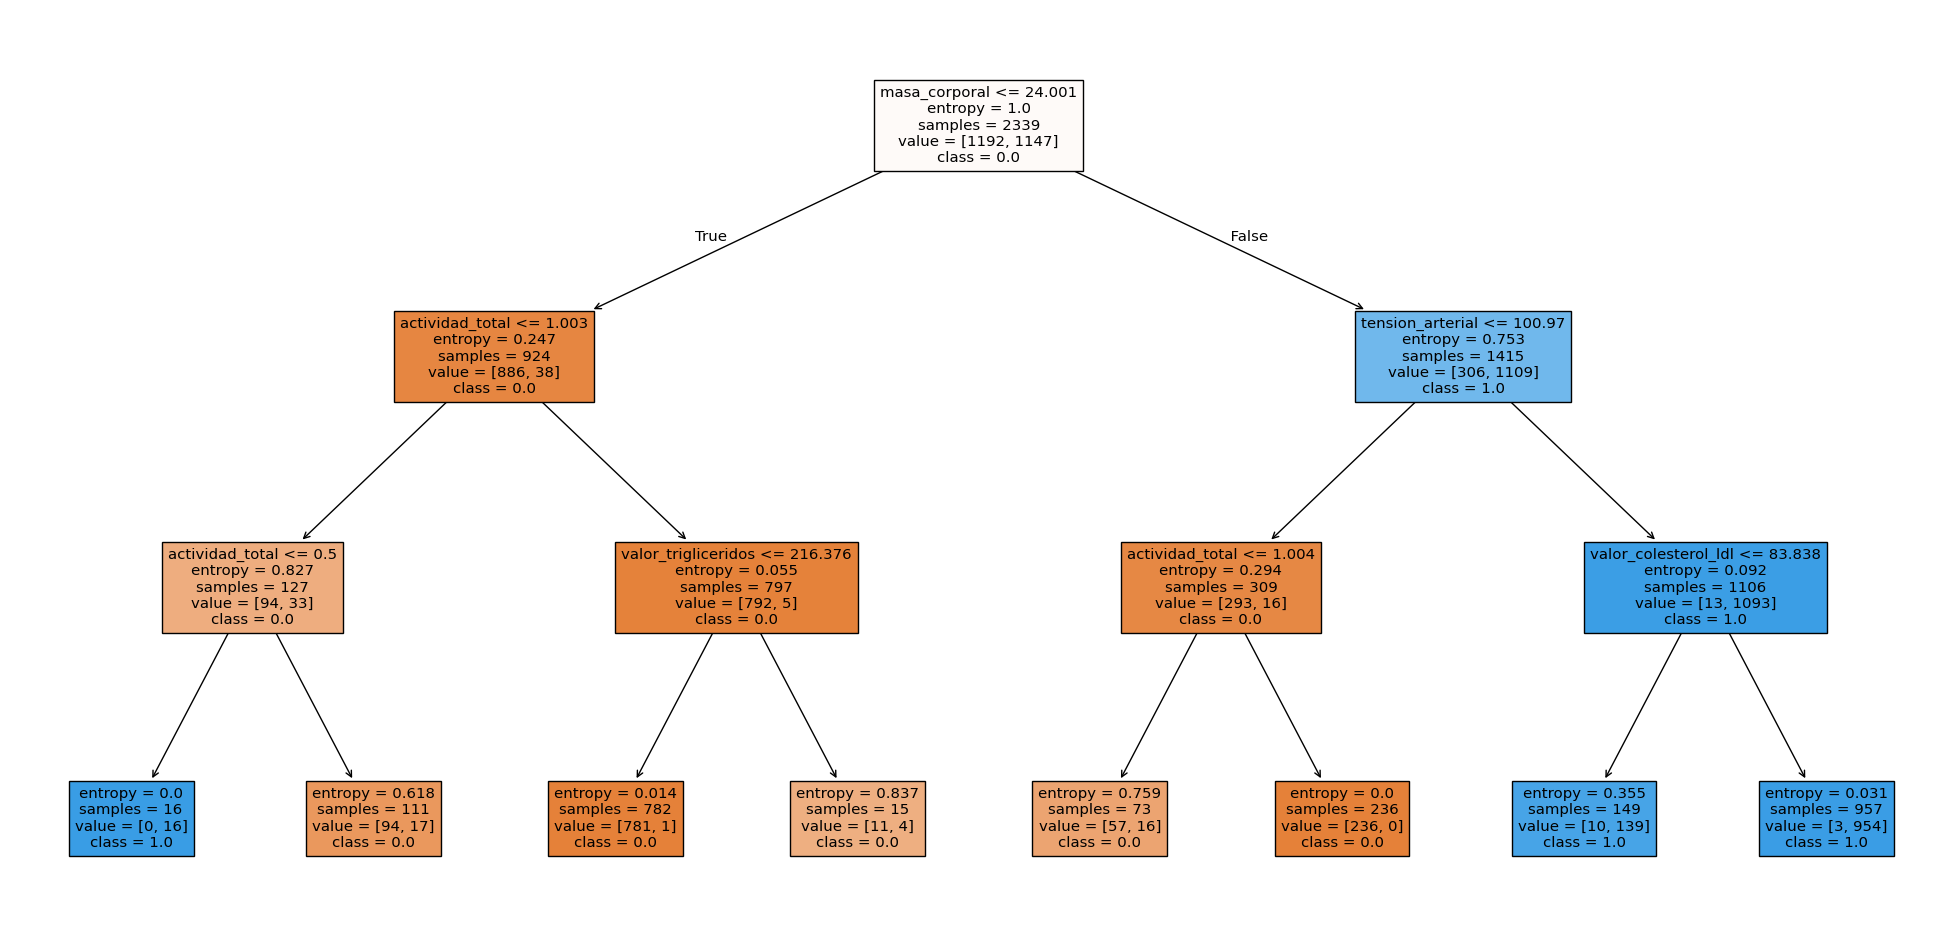

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt.fit(X_train, y_train)

yt_pred = dt.predict(X_test)

print("\nReporte de clasificación:\n", metrics.classification_report(y_test, y_pred))

plt.figure(figsize=(25,12))
plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in dt.classes_], filled=True)
plt.show()


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, classification_report

rf = RandomForestClassifier(n_estimators=127, max_depth=20, random_state=42)

rf.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

def evaluar_modelo(nombre, y_true, y_pred, modelo):
    print(f"\n {nombre}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    if len(set(y_true)) == 2:
        y_proba = modelo.predict_proba(X_test)[:, 1]
        print("ROC-AUC:", roc_auc_score(y_true, y_proba))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

evaluar_modelo("Árbol de Decisión", y_test, y_pred_dt, dt)
evaluar_modelo("Random Forest", y_test, y_pred_rf, rf)

cv_dt = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
cv_rf = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

print("Árbol de Decisión:", cv_dt.mean(), "±", cv_dt.std())
print("Random Forest:", cv_rf.mean(), "±", cv_rf.std())



 Árbol de Decisión
Accuracy: 0.9820538384845464
F1-score: 0.982060910370826
Recall: 0.9820538384845464
ROC-AUC: 0.9946313885480247

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       479
         1.0       0.99      0.97      0.98       524

    accuracy                           0.98      1003
   macro avg       0.98      0.98      0.98      1003
weighted avg       0.98      0.98      0.98      1003


 Random Forest
Accuracy: 0.9830508474576272
F1-score: 0.9830571558261655
Recall: 0.9830508474576272
ROC-AUC: 0.997519880794913

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       479
         1.0       0.99      0.97      0.98       524

    accuracy                           0.98      1003
   macro avg       0.98      0.98      0.98      1003
weighted avg       0.98      0.98      0.98      1003

Árbol de Decisión: 0.978754598426465

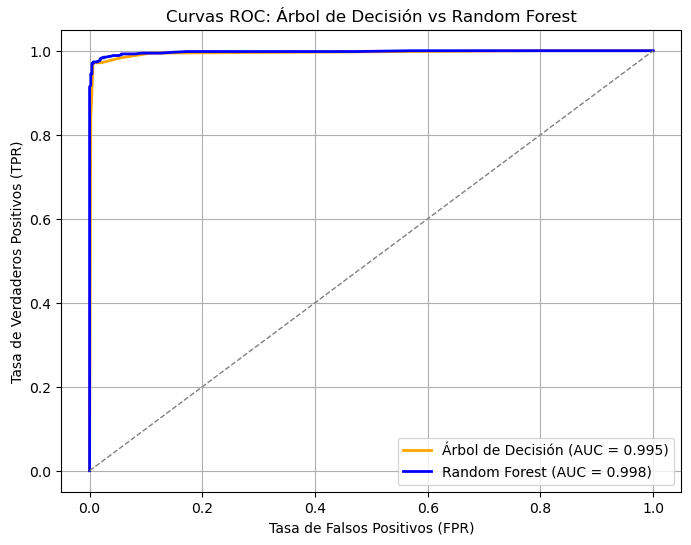

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Probabilidades para el cálculo de ROC
y_proba_dt = dt.predict_proba(X_test)[:, 1]
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Calcular FPR, TPR para cada modelo
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='orange', lw=2,
         label=f'Árbol de Decisión (AUC = {roc_auc_dt:.3f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2,
         label=f'Random Forest (AUC = {roc_auc_rf:.3f})')

# Línea base (azar)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC: Árbol de Decisión vs Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
